In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [110]:
w = open('sweep-energy.dat','w')  

energy_dat=[]
intensity_dat=[]

# Write a for loop to write into the .dat file
energy=1e-3

for i in range(10):
    energy= energy*3 # This will give 10e-3, 10e-2 ... 10e1
    w.write(str("%.4f" % energy))
    w.write(' ')
    w.write(str(1))
    w.write('\n')
        
    energy_dat.append(energy)
    intensity_dat.append(1)

# Close the file
w.close()

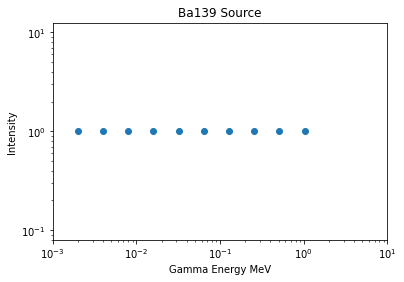

In [120]:
# Plot data to see what is going on 
plt.clf()
plt.scatter(energy_dat,intensity_dat)
#plt.xlim(0,0.2)
#plt.ylim(0,5)

plt.yscale('log')
plt.xscale('log')
plt.title('Ba139 Source')
plt.xlabel('Gamma Energy MeV')
plt.ylabel('Intensity')
plt.xlim(1e-3,10)

plt.savefig('Ba139-source.jpg')
#plt.show()

In [163]:
# Writing the first part of the macro (doesn't change the filename)

def write_macro_top(w):  
    w.write('/run/initialize')
    w.write('\n')
    w.write('/gps/particle gamma')
    w.write('\n')
    w.write('/gps/position 0 0 0 cm')
    w.write('\n')
    w.write('/gps/direction 0 0 1')
    w.write('\n')
    w.write('/gps/pos/type Point')
    w.write('\n')
    w.write('/gps/ang/type iso')
    w.write('\n')
    w.write('\n')

# MACRO WRITING TO MAKE DIFFERENT FILES FOR EACH ENERGY 

def write_macro_end(w,name):

    energy_dat=[]
    intensity_dat=[]

    # Write a for loop to write into the .dat file

    energy=1e-3

    for i in range(15):
        energy= energy*2
        w.write(str("/gps/energy %.4f MeV" % energy))
        w.write('\n')
        w.write(str("/analysis/setFileName %s-%i" %(name,i)))      ## change filename here
        w.write('\n')
        w.write(str("/run/beamOn 100000"))
        w.write('\n')
        w.write('\n')
        w.write('\n')
        
        energy_dat.append(energy)
        intensity_dat.append(1)   
    
# Write the whole macro:
def write_macro(name):
    
    file = str('sweep-macro-%s.mac' %name)
    w = open(file,'w')     
    
    write_macro_top(w)
    write_macro_end(w,name)
    
    # Close the file
    w.close()

In [164]:
def energyspec():
    
    w=open("energy_spec.dat",'w')
    
    energy=1e-3

    for i in range(15):
        energy = energy *2
        w.write(str("%.4f") %energy)
        w.write('\n')
        
    w.close()

In [166]:
write_macro('Na-t1')
write_macro('Na-t3')
write_macro('Na-t5')
write_macro('Na-t7')
write_macro('Na-t9')
write_macro('Na-t11')